# Pattern Matching 4 - Video, Matching & Tracking

**Objectives**

* Analyze video sequences
* Match objects between frames for tracking

## Video import

[Download](https://www.dropbox.com/s/j8zrt29ofne65m2/video_data.zip?dl=1) the images from the video sequence, and the supervised segmentation ground truth: 

(Reference: http://groups.inf.ed.ac.uk/f4k/PAPERS/VIGTA2012.pdf)

<IPython.core.display.Javascript object>


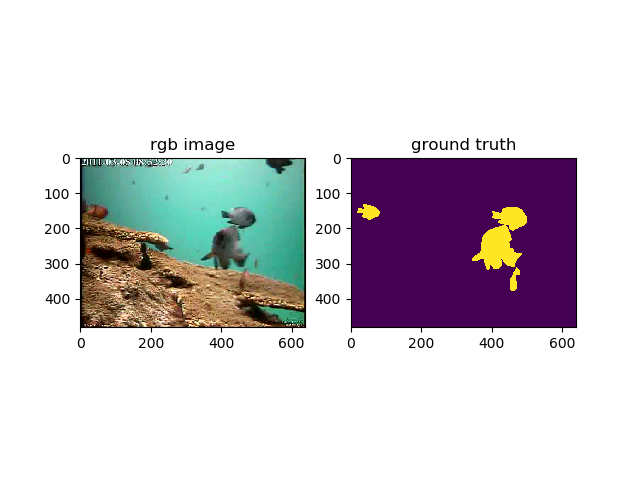

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib notebook

from skimage.io import imread
from skimage import exposure, filters, color
from skimage import morphology
import os

vid_path = 'Video/'
gt_path = 'GroundTruth/'

seq0 = [685,705]
seq1 = [1173,1191]

for no in range(*seq1):
    fid = os.path.join(vid_path,'frame%04d.jpg'%no)
    rgb = imread(fid)    
    
    fid =  os.path.join(gt_path,'%d.png'%no)
    supervision = imread(fid)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('rgb image')
    plt.imshow(rgb)
    plt.subplot(1,2,2)
    plt.imshow(supervision)
    plt.title('ground truth')
    break #stop after one frame for test purpose

## Background image (Video segmentation)

When analyzing video sequences, we can use the *movement of the frame* to help our object segmentation. In this video, our goal is to segment the fish from the background. The background here is the part of the image that doesn't change from frame to frame: detecting the objects can therefore be done using **background subtraction**.

Implement the background subtraction algorithm:

1. Initialize background image: $B_{0} = I_{0}$ where $I_t$ is the image at time $t$ and $B$ is the estimated background. 
1. Update background: $B_{t} = \alpha B_{t-1} + (1-\alpha) I_t$
> What is the purpose of $\alpha$? How can you determine that your background estimation is "stable" and can be used?
1. Subtract background to detect foreground: $F_t = I_t - B_t$
1. Find a good post-processing to clean-up the foreground image. Label the individual objects (fish).
1. Using the supervised part of the sequence, estimate the detection error of your algorithm.
> *Hint: useful metrics for segmentation performance include per-pixel accuracy, precision, recall, or F1-score (DICE). These measures can also be made per-object, which is slightly more difficult to compute but in many applications a better indicator of the actual performance of the algorithm.*

In [125]:
seq = seq1
alpha = 0.999
fid = os.path.join(vid_path,'frame%04d.jpg'%(1))
background = imread(fid)

for no in range(2, seq[0]):
    fid = os.path.join(vid_path,'frame%04d.jpg'%(no))
    img = imread(fid)
    background = alpha*background + (1-alpha)*img
    
    

In [ ]:
def hist_eq(img):
    

(480, 640)


<IPython.core.display.Javascript object>


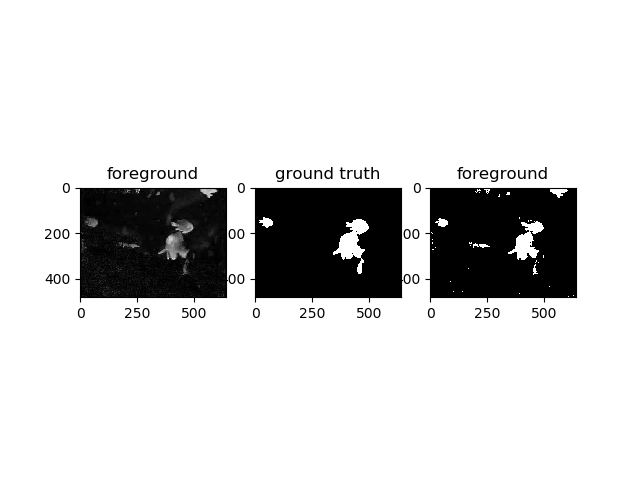

(480, 640)


<IPython.core.display.Javascript object>


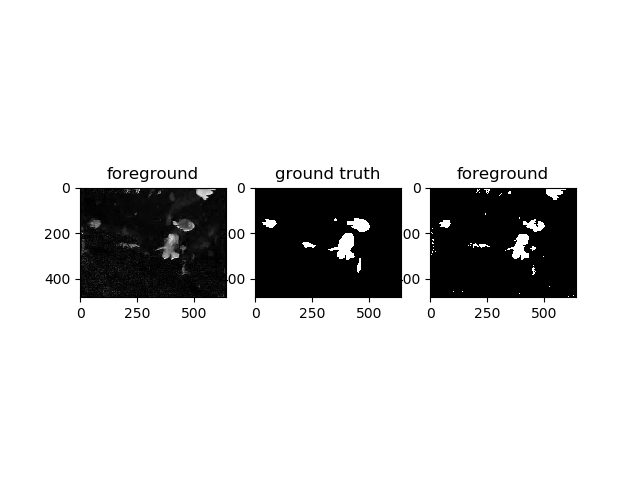

(480, 640)


<IPython.core.display.Javascript object>


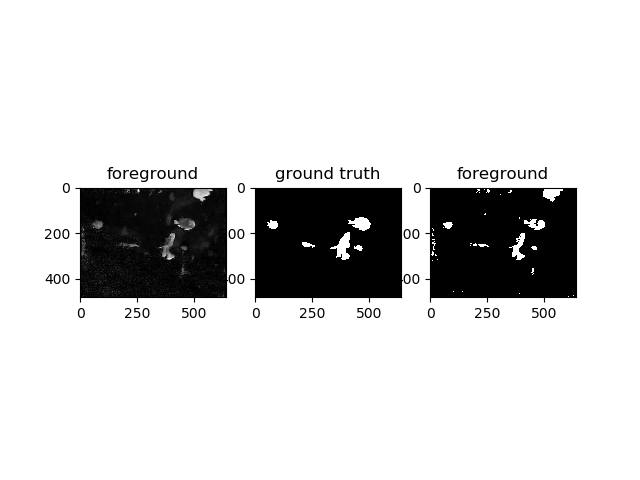

(480, 640)


<IPython.core.display.Javascript object>


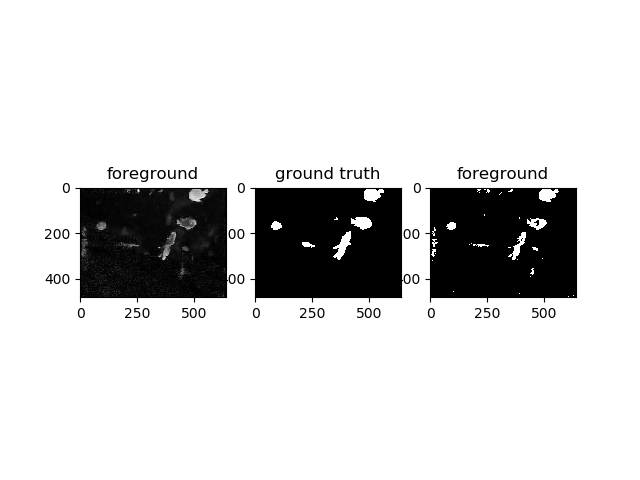

(480, 640)


<IPython.core.display.Javascript object>


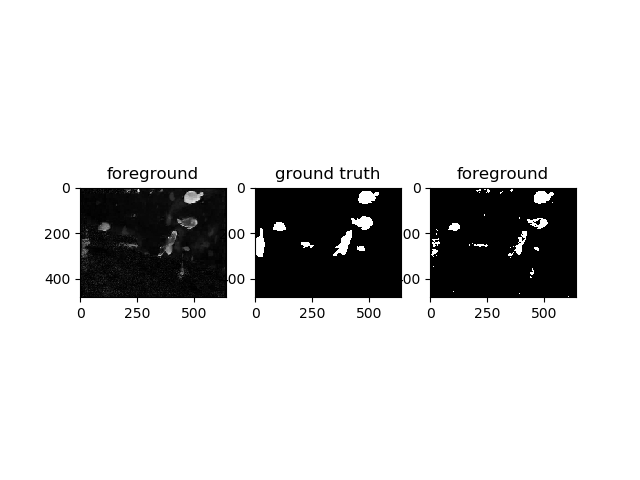

(480, 640)


<IPython.core.display.Javascript object>


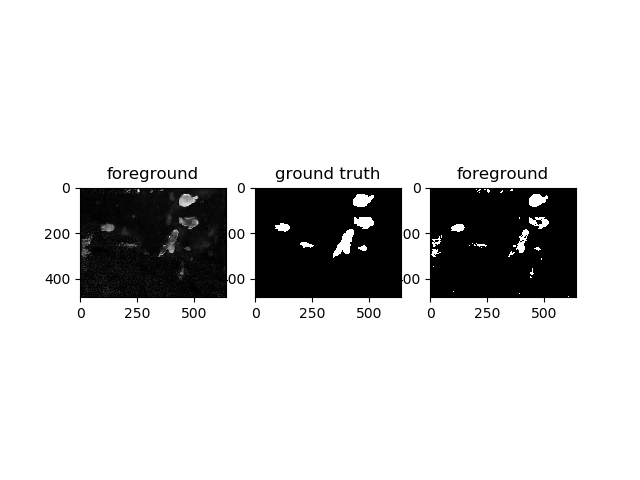

(480, 640)


<IPython.core.display.Javascript object>


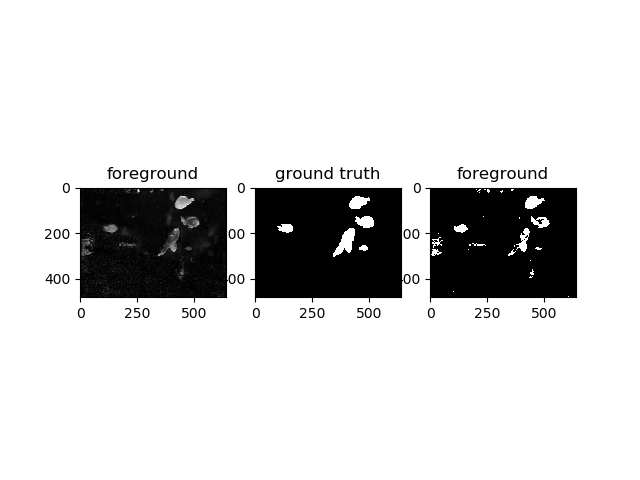

(480, 640)


<IPython.core.display.Javascript object>


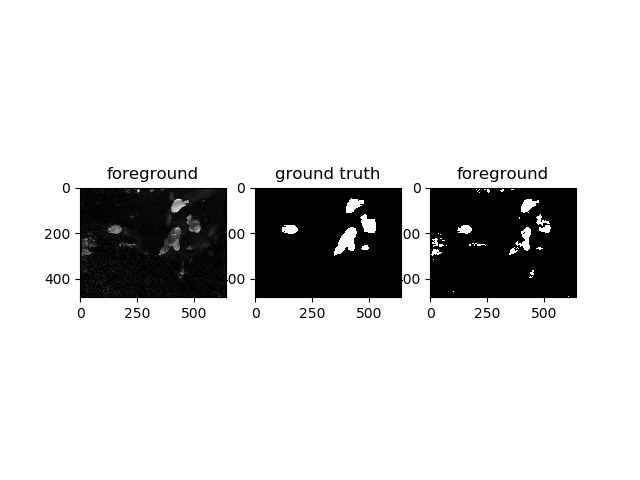

(480, 640)


<IPython.core.display.Javascript object>


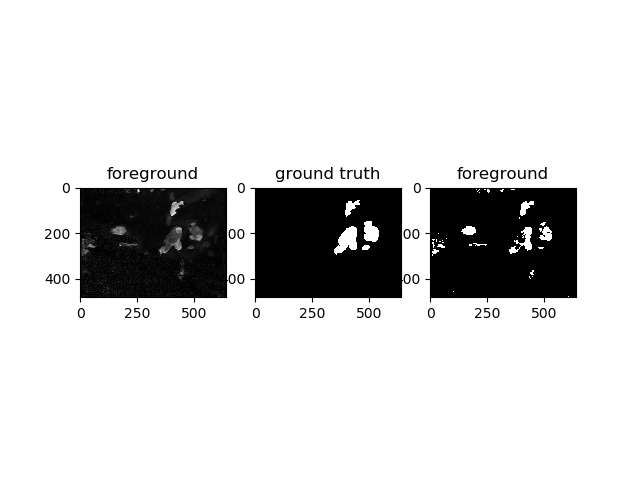

(480, 640)


<IPython.core.display.Javascript object>


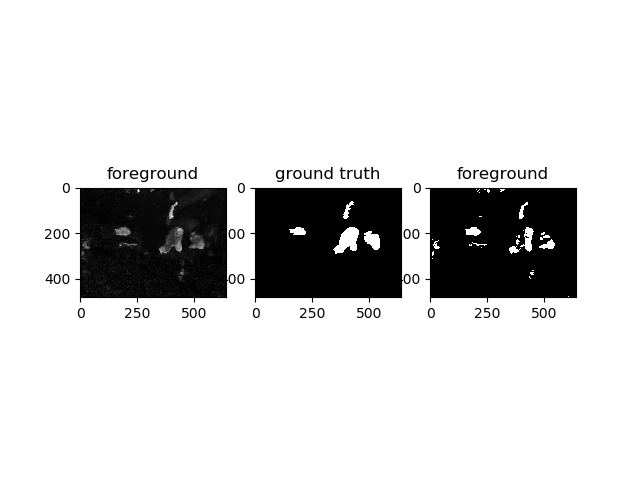

(480, 640)


<IPython.core.display.Javascript object>


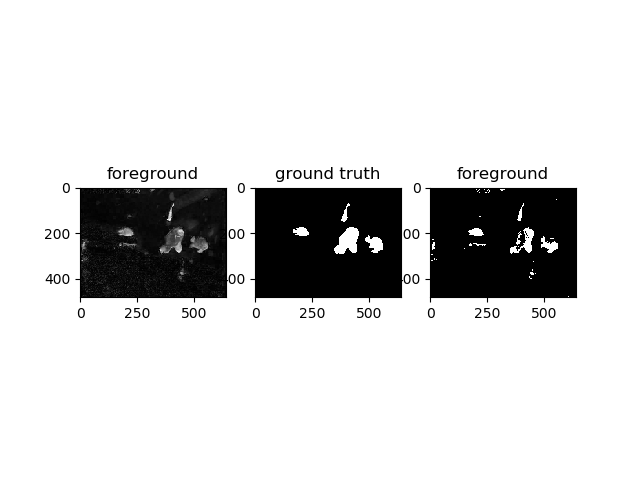

(480, 640)


<IPython.core.display.Javascript object>


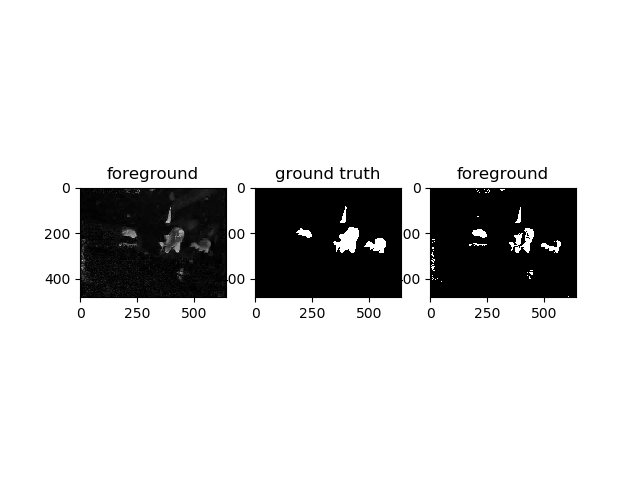

(480, 640)


<IPython.core.display.Javascript object>


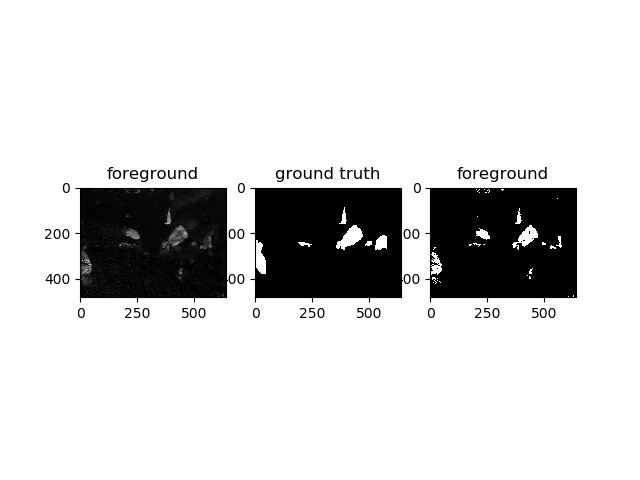

(480, 640)


<IPython.core.display.Javascript object>


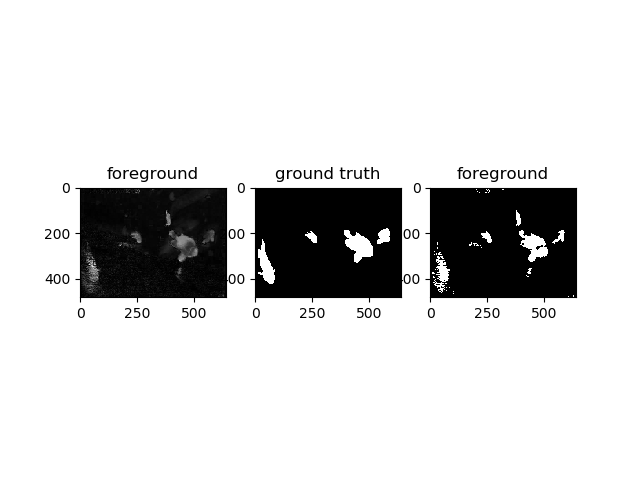

(480, 640)


<IPython.core.display.Javascript object>


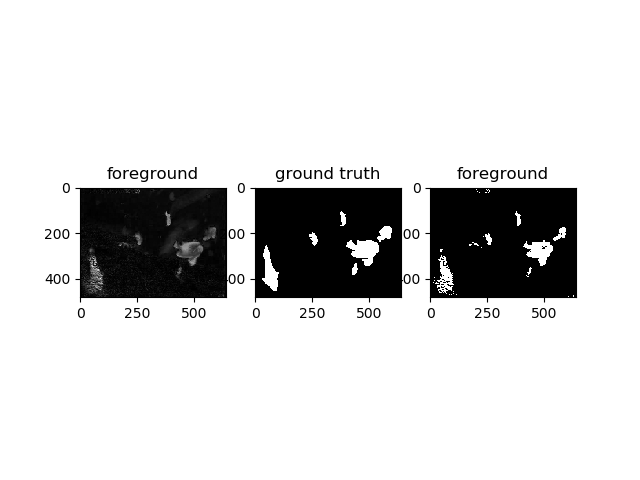

(480, 640)


<IPython.core.display.Javascript object>


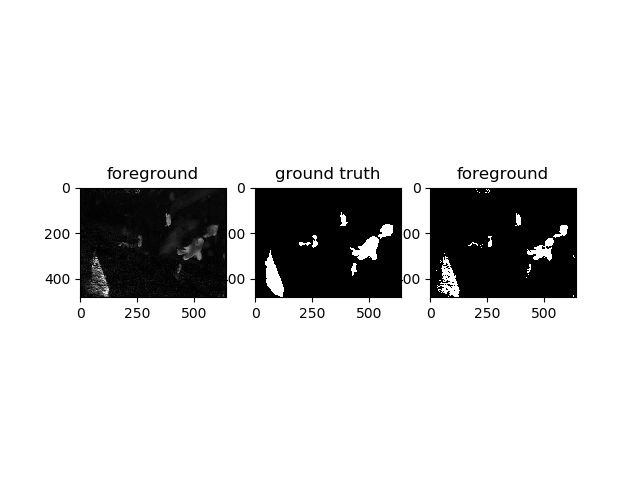

(480, 640)


<IPython.core.display.Javascript object>


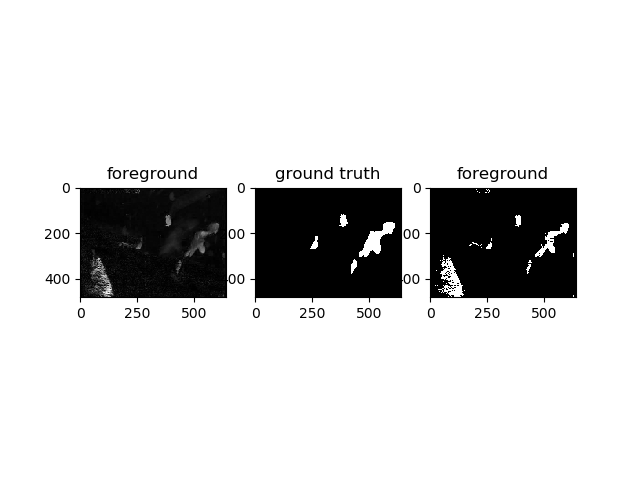

(480, 640)


<IPython.core.display.Javascript object>


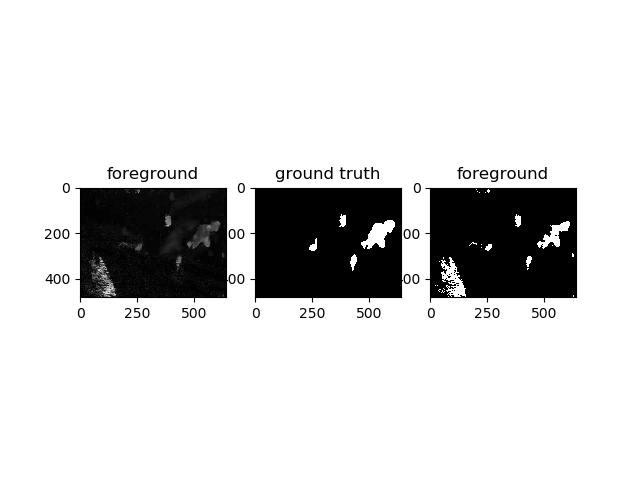

In [169]:
for no in range(*seq):
    fid = os.path.join(vid_path,'frame%04d.jpg'%(no))
    img = imread(fid)
    
    fid =  os.path.join(gt_path,'%d.png'%no)
    supervision = imread(fid)
    
    background = alpha*background + (1-alpha)*img
    foreground = img-background
    foreground_bw = np.sqrt(foreground[:,:,0]**2+foreground[:,:,1]**2+foreground[:,:,2]**2)
    print(foreground_bw.shape)
    val = 70# filters.threshold_triangle(foreground_bw)
    mask = foreground_bw > val
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.title('foreground')
    plt.imshow(foreground_bw.astype(int), cmap=cm.gray)
    plt.subplot(1,3,2)
    plt.imshow(supervision.astype(int), cmap=cm.gray)
    plt.title('ground truth')
    plt.subplot(1,3,3)
    plt.imshow(mask, cmap=cm.gray)
    plt.title("foreground")
    #break #stop after one frame for test purpose

## Object tracking

1. Extract interesting features from the detected objects.
1. Suggest a method to recognise and track objects from one frame to the next frame.

In [3]:

# -- Your code here -- #
